In [1]:
#Tensorflow Import and GPU recognition
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18256893745916687636, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14009779190393897869
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12661905229121390702
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6946880907798299649
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip '/content/drive/My Drive/Progetto Advanced Machine Learning/fruits.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: /co

In [0]:
#Importing Keras and other useful libs
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser
from glob import glob
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Defining dataset path and saving it for future usage
path = '/content/fruits-360_dataset/fruits-360'
os.listdir(path)

['papers', 'Training', 'readme.md', 'LICENSE', 'test-multiple_fruits', 'Test']

In [7]:
#Number of pictures in Training folder
training_files = glob(os.path.join(path,'Training', '*/*.jpg'))
image_num = len(training_files)
print("Number of Images: ",image_num)

Number of Images:  60498


In [8]:
#Number of pictures in Test Folder
testing_files = glob(os.path.join(path, 'Test', '*/*.jpg'))
img_num = len(testing_files)
print("Number of Images: ", img_num)

Number of Images:  20622


In [9]:
#Print category details
image_count = []
class_names = []
print('{:18s}'.format('Class'), end='')
print('Count:')
print('-'*24)
for folder in os.listdir(os.path.join(path,'Training')):
  folder_count = len(os.listdir(os.path.join(path,'Training',folder)))
  image_count.append(folder_count)
  class_names.append(folder)
  print('{:20s}'.format(folder), end='')
  print(folder_count)
print('-'*24)
print('Number of Classes:', len(class_names))
print('Average number of images per Class: ', np.array(image_count).mean())

Class             Count:
------------------------
Nectarine           492
Apricot             492
Walnut              735
Lemon               492
Papaya              492
Potato Sweet        450
Apple Golden 1      492
Peach 2             738
Apple Red 2         492
Plum                447
Pear Williams       490
Mango Red           426
Tomato 4            479
Kiwi                466
Ginger Root         99
Peach               492
Grape Blue          984
Granadilla          490
Tamarillo           490
Limes               490
Mangostan           300
Apple Red Delicious 490
Cherry Rainier      738
Pomelo Sweetie      450
Apple Braeburn      492
Passion Fruit       490
Pitahaya Red        490
Pineapple           490
Huckleberry         490
Grape White 4       471
Cantaloupe 1        492
Apple Golden 2      492
Onion Red           450
Apple Golden 3      481
Apple Pink Lady     456
Physalis with Husk  492
Redcurrant          492
Pepper Yellow       666
Tomato Yellow       459
Hazelnut       

In [10]:
#Definitive paths
train_out_path = os.path.join(path,'Training')
test_out_path = os.path.join(path, 'Test')
print(train_out_path)
print(test_out_path)

/content/fruits-360_dataset/fruits-360/Training
/content/fruits-360_dataset/fruits-360/Test


In [0]:
#Implementing some augmentation to avoid overfitting on the training generator
train_datagenerator = ImageDataGenerator(rotation_range=30, zoom_range=0.2, horizontal_flip=True, validation_split=0.2, data_format='channels_last')
train_and_val_generator = ImageDataGenerator(rotation_range=30, zoom_range=0.2, horizontal_flip=True, data_format='channels_last')
test_datagenerator = ImageDataGenerator(data_format='channels_last')

In [12]:
#Creating Batches
image_size = (256, 256)
train_batches = train_datagenerator.flow_from_directory(train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='training', seed = 20052020)
val_batches = train_datagenerator.flow_from_directory(directory=train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='validation', seed = 20052020)
train_val_batches = train_and_val_generator.flow_from_directory(directory=train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, seed = 20052020)
test_batches = test_datagenerator.flow_from_directory(directory=test_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, shuffle=False)

Found 48431 images belonging to 120 classes.
Found 12067 images belonging to 120 classes.
Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


In [0]:
#2 Approach: Inception v3 pre-trained
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [14]:
inception_v3_model = InceptionV3(include_top=False, weights='imagenet')
#Using pretrained
for layer in inception_v3_model.layers:
  layer.trainable=False
# add preprocessing layer
inputs = Input(shape=image_size+(3,))
x = preprocess_input(inputs, data_format='channels_last')
x = inception_v3_model(x)
#Adding Layers at the top
x = GlobalAveragePooling2D(data_format='channels_last', name='avg_pool')(x)
x = Dropout(0.00010037070129684666)(x)
#Adding Classification layer with softmax activation function, (needed for categorical predictions)
predictor = Dense(120 ,activation='softmax', name='predictor', kernel_regularizer=l2(6.006172096720402e-09))(x)
inception_v3_model = Model(inputs, outputs=predictor)

# just to be sure
for layer in inception_v3_model.layers[:-1]:
  layer.trainable = False

inception_v3_model.compile(optimizer=Adam(0.006097666538935929), loss='categorical_crossentropy', metrics=['accuracy'])
inception_v3_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 256, 256, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         multiple                  21802784  
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
______________________________________________________________

In [15]:
inception_v3_model.save_weights('/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/Inital Weights.hdf5')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
inception_v3_model.fit(train_batches, epochs=15, verbose=1, validation_data=val_batches, workers=2, callbacks=[early_stopping])
print('Stopped epoch: {}'.format(early_stopping.stopped_epoch))

Epoch 1/15
1514/1514 [==============================] - 775s 512ms/step - loss: 0.7285 - accuracy: 0.8438 - val_loss: 0.7700 - val_accuracy: 0.8619
Epoch 2/15
1514/1514 [==============================] - 791s 522ms/step - loss: 0.3544 - accuracy: 0.9317 - val_loss: 0.7783 - val_accuracy: 0.8967
Epoch 3/15
1514/1514 [==============================] - 778s 514ms/step - loss: 0.3098 - accuracy: 0.9495 - val_loss: 0.8430 - val_accuracy: 0.9076
Stopped epoch: 2


In [17]:
inception_v3_model.load_weights('/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/Inital Weights.hdf5')
trainingMdl = inception_v3_model.fit(train_val_batches, epochs=early_stopping.stopped_epoch, verbose=1, validation_data=test_batches, workers=2)

Epoch 1/2
1891/1891 [==============================] - 922s 487ms/step - loss: 1.0132 - accuracy: 0.8692 - val_loss: 0.7248 - val_accuracy: 0.8903
Epoch 2/2
1891/1891 [==============================] - 895s 473ms/step - loss: 0.3395 - accuracy: 0.9441 - val_loss: 0.9116 - val_accuracy: 0.8926


In [0]:
# rename
model = inception_v3_model

In [26]:
#plot training history
import sys
sys.path.append('/content/drive/My Drive/Progetto Advanced Machine Learning/')
import utils
history_fig = utils.plot_history(trainingMdl)
history_fig.show()

In [0]:
# save model
import datetime
save_path = '/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/'
save_path += 'Inception v3 After HPO'
save_path += ' ' + str(datetime.datetime.now())
model.save(save_path + '.hdf5')

In [30]:
#save training history plot
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
history_fig.write_image(save_path +'.pdf', format='pdf')

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [0]:
#save training history
import pickle
with open(save_path +'.history.pickle', 'wb') as f:
  pickle.dump(trainingMdl.history, f)

Confusion Matrix


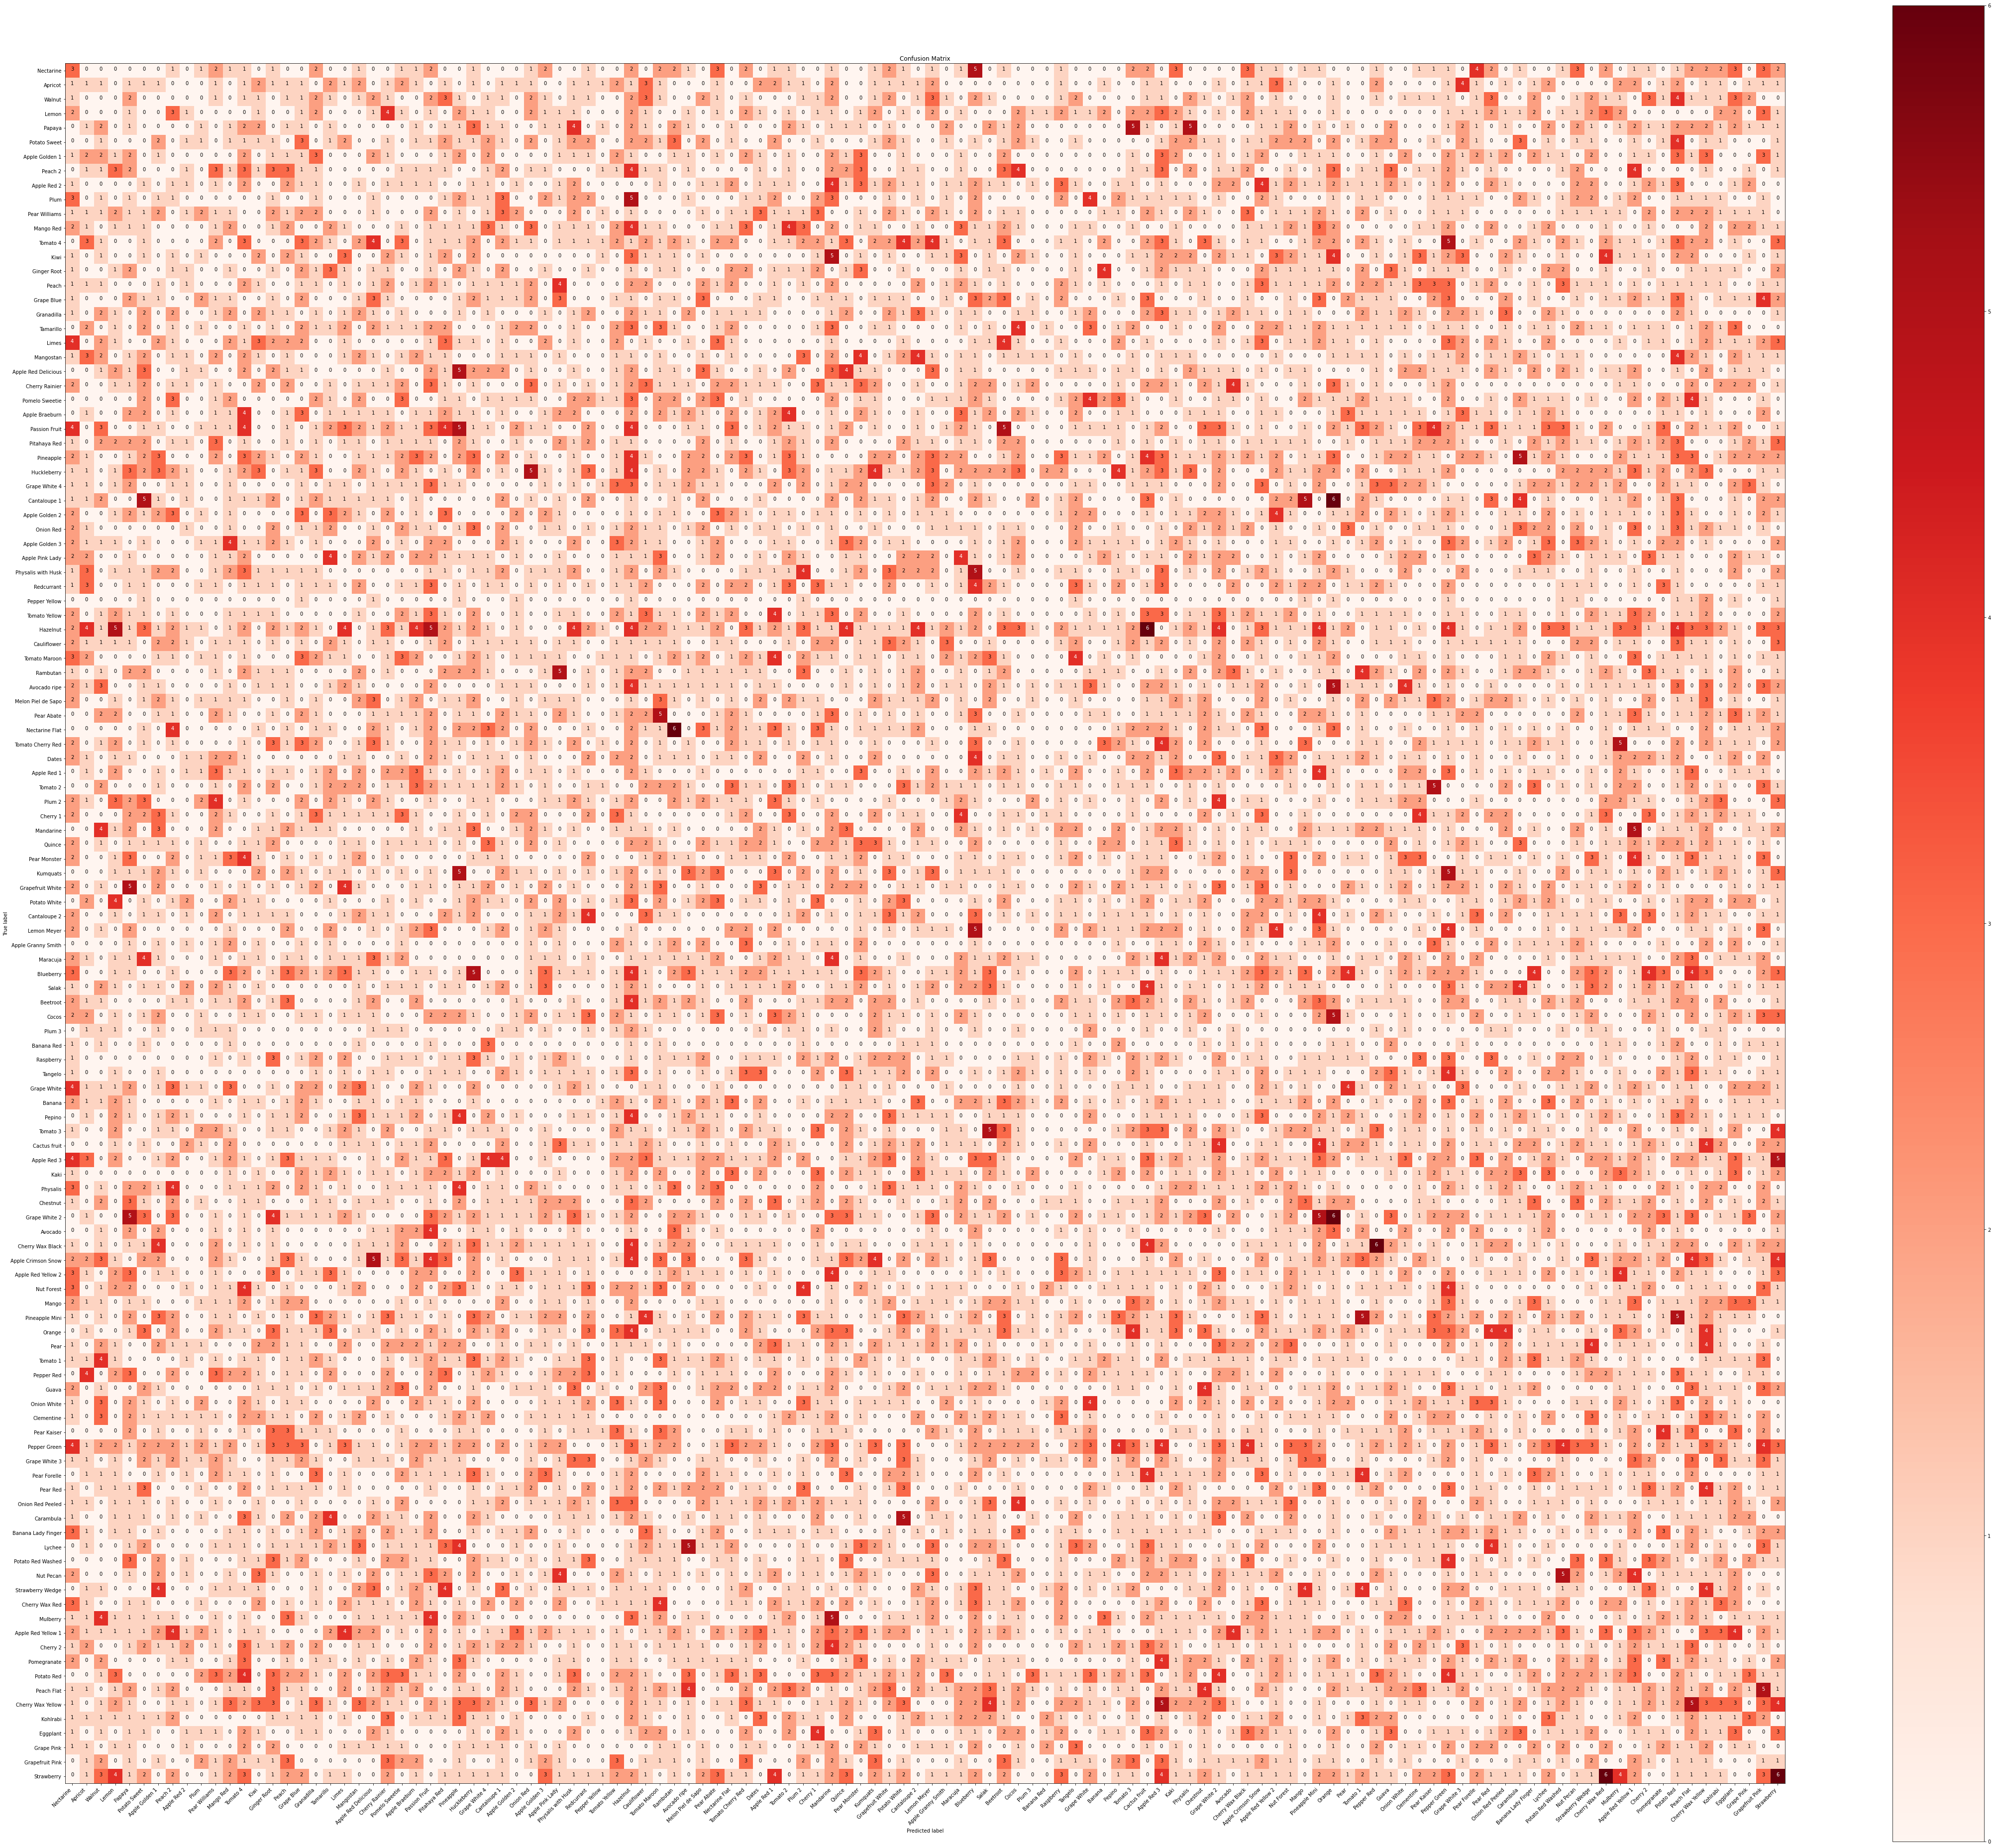

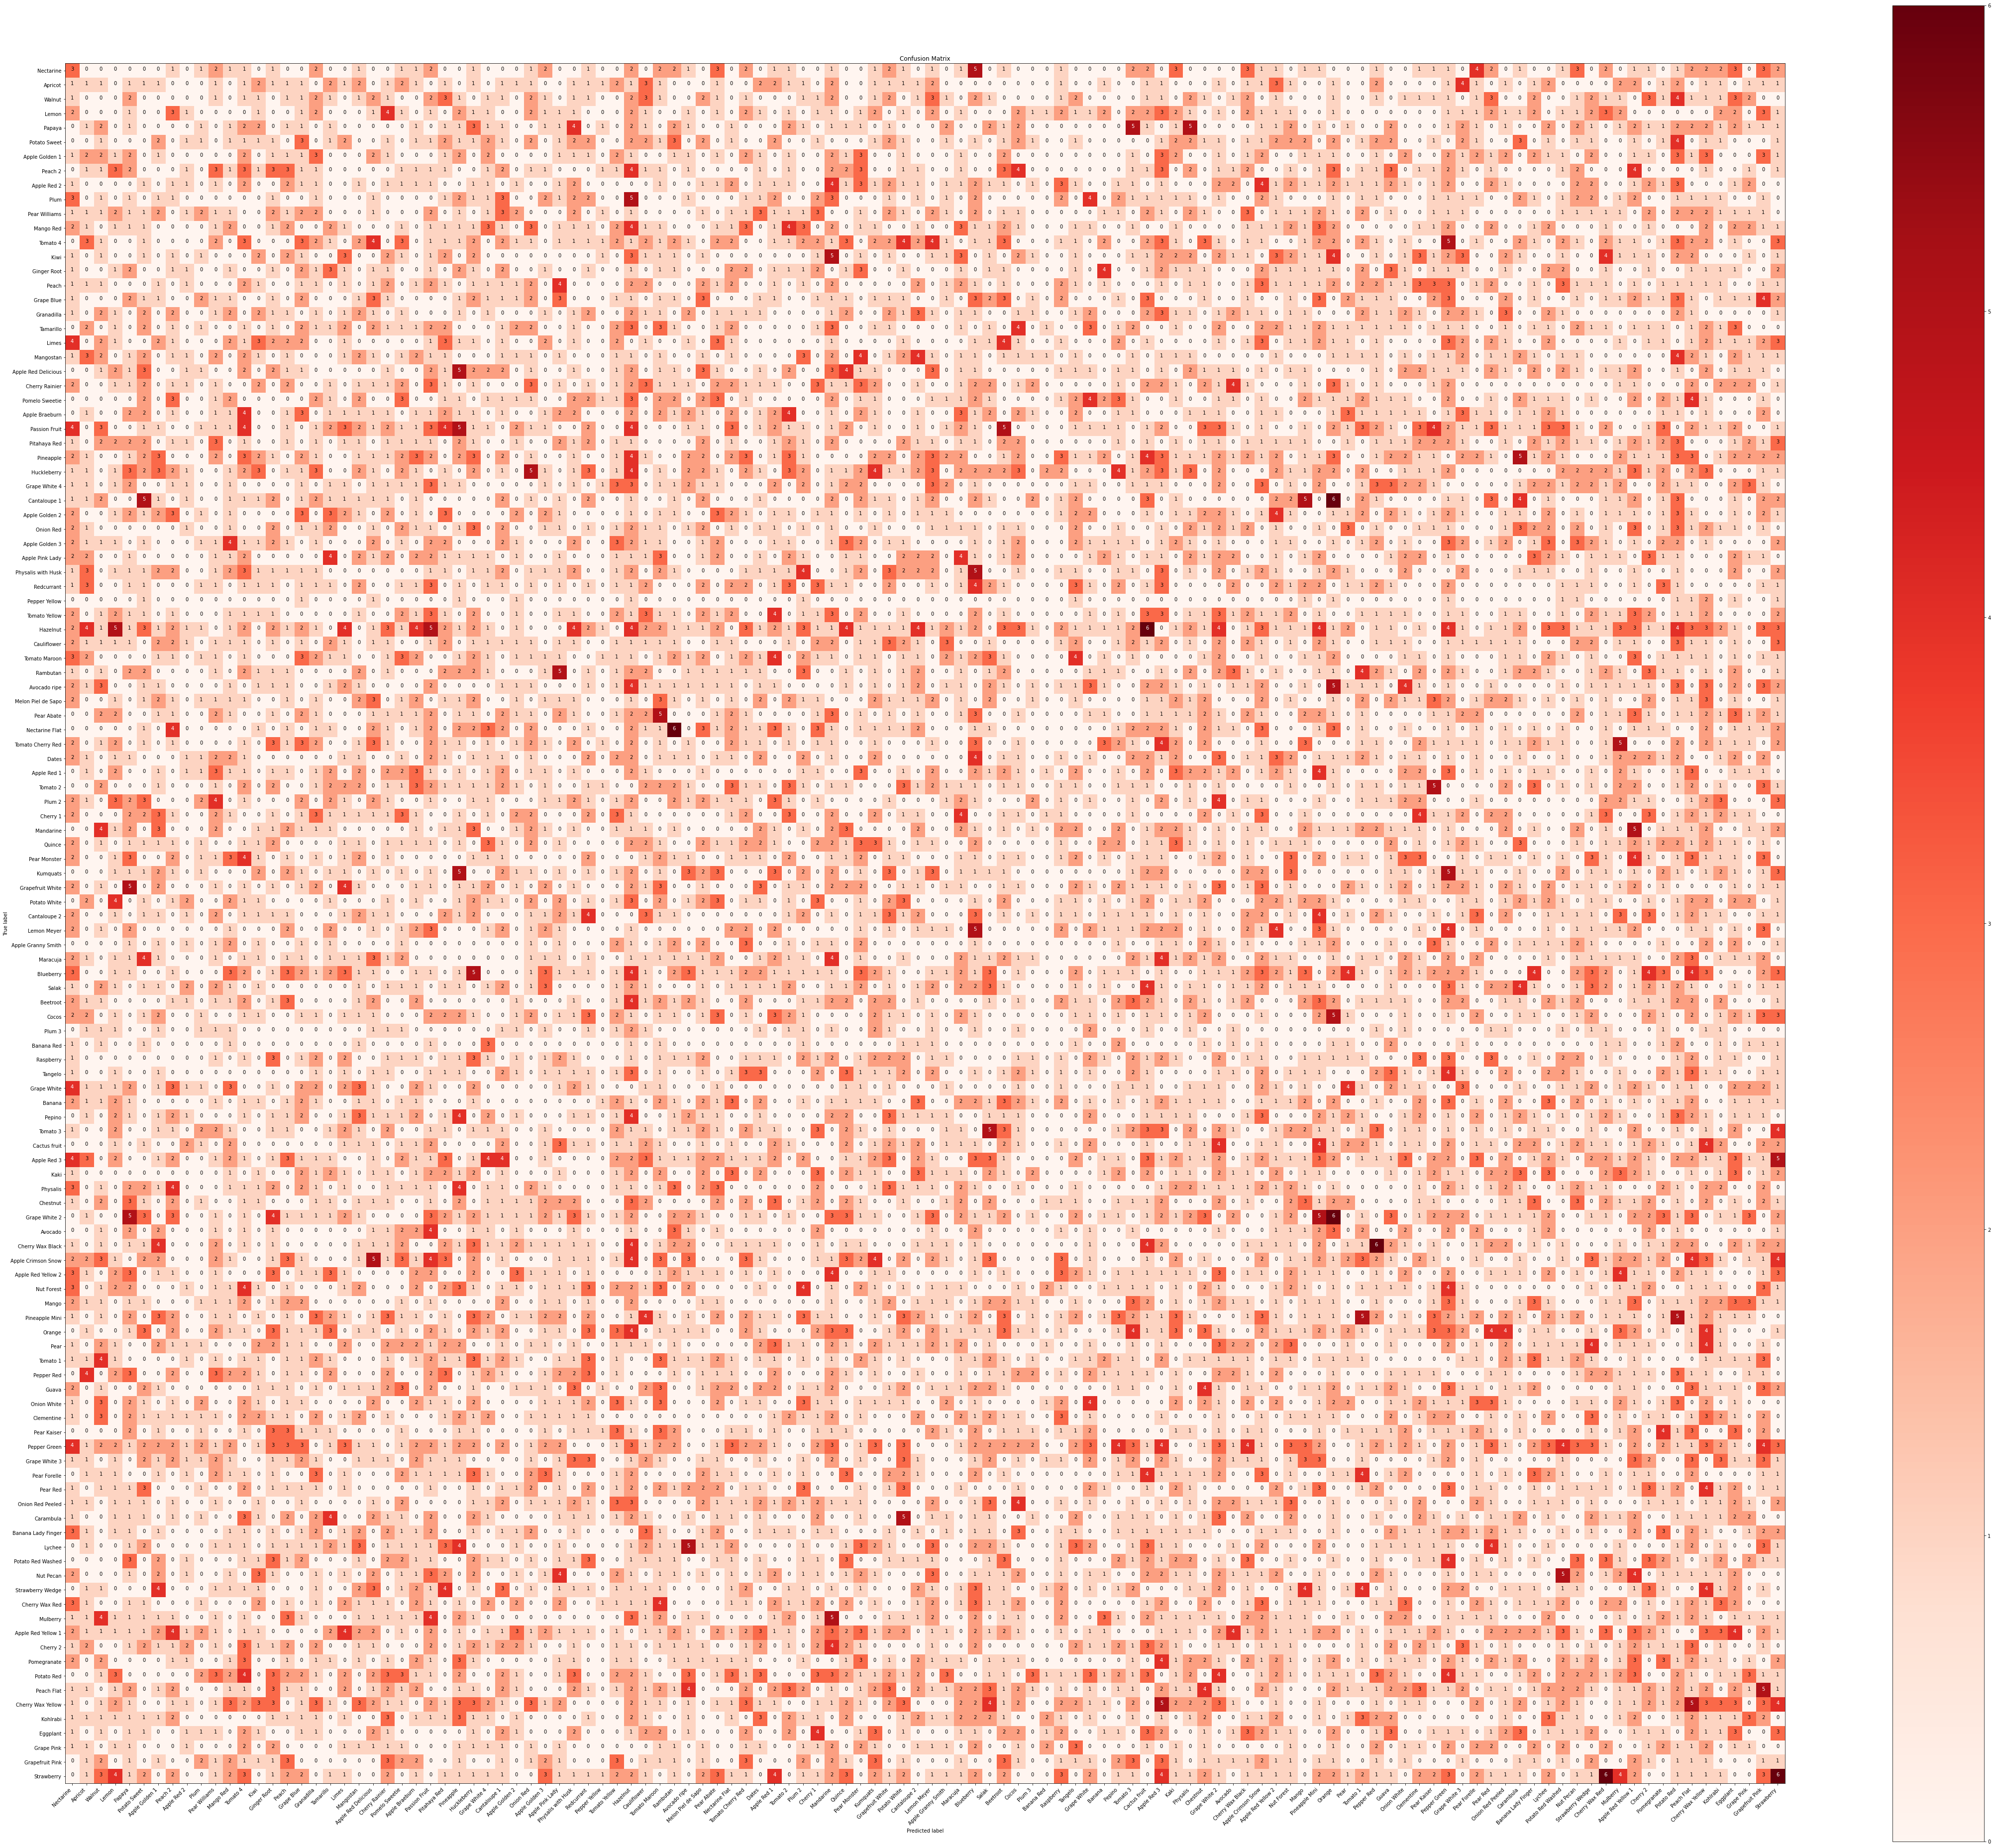

In [34]:
import matplotlib.pyplot as plt
cm = utils.get_confusion_matrix(model, val_batches)
fig = utils.plot_cm(cm, class_names)
plt.savefig(save_path + '.confusion_matrix.pdf', format='pdf')
fig